# Task 1 -> Titanic Survival Prediction

#Importing required Libaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

#Loading the dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [5]:
import pandas as pd
titanic_df=pd.read_csv("/content/Titanic-Dataset.csv")

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now Understanding the data is the next required step, understanding in detail about this Titanic Dataset.

1. Here Survived column states that weather the passengers survived or not 0 = Not survived , 1 = Survived.
2. Here Pclass signifies Ticket class that is 1 = 1st, 2 = 2nd, 3 = 3rd classes.
3. Here sibsp is number of siblings / spouses who aboarded the titanic.
4. parch is number of parents / chicken who aboarded the titanic.
5. ticker is ticket number.
6. fare is passenger's fare amount.
7. cabin is cabin number
8. embarked is Port of embarkation C = Cherbourg, Q = Queenstown, S = Southampton.

In [7]:
# Checking the number of rows and columns
titanic_df.shape

(891, 12)

In [8]:
# Extra information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking if there are any missing values in the dataset

In [9]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handlimg the missing values

In [10]:
# Replacing missing values in the Age column with mean value
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [11]:
# Droping the cabin column from the dataset
titanic_df=titanic_df.drop(columns='Cabin', axis=1)

In [12]:
# Finding the mode value of embarked column
print(titanic_df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
# Replacing the missing values in embarked column with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [14]:
# Checking number of missing values after handling
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Now knowing the statistical measures about the dataset

In [15]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Finding the number of people Survived and Not Survived

In [16]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Creating the Visualization of Survived and Not Survived

In [17]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

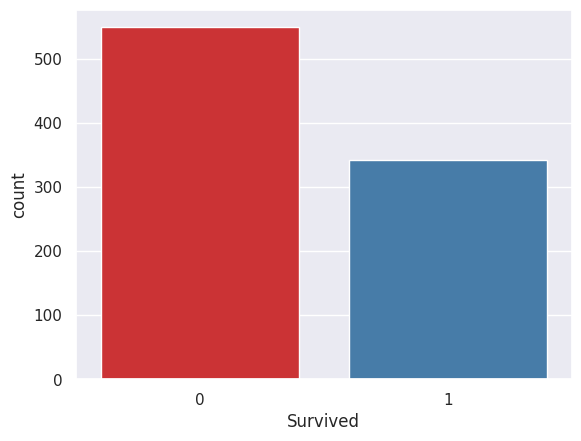

In [18]:
# Count plot for Survived column
sns.set()
sns.countplot(x='Survived', data=titanic_df, hue='Survived', palette='Set1', dodge=False, legend=False)

# Sex Count on the titanic ship

In [19]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Plotting the Sex Count

<Axes: xlabel='Sex', ylabel='count'>

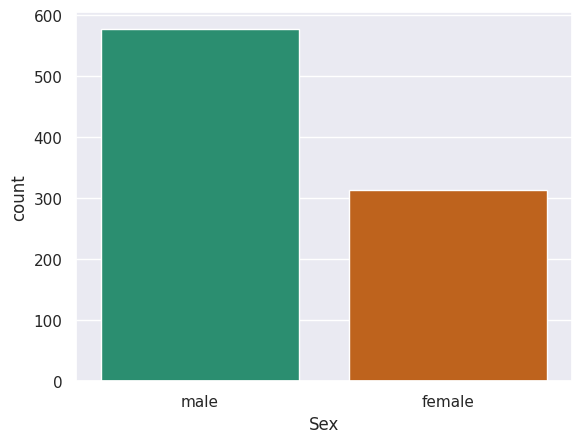

In [20]:
sns.set()
sns.countplot(x='Sex', data=titanic_df, hue='Sex', palette='Dark2', dodge=False, legend=False)

# Visualizing the number of Survivors with respect to Gender

<Axes: xlabel='Sex', ylabel='count'>

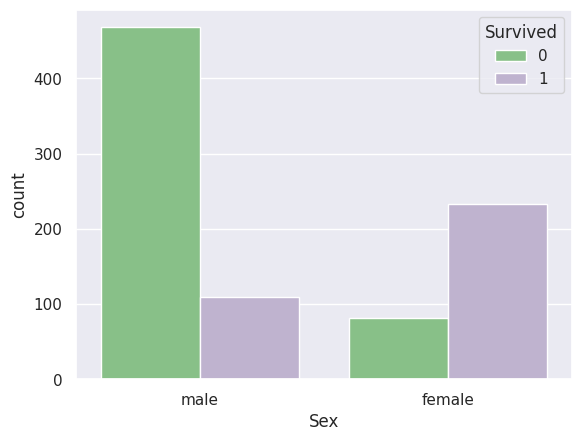

In [21]:
sns.set()
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette='Accent')

# Plotting the PClass Column for understanding the Class distribution

<Axes: xlabel='Pclass', ylabel='count'>

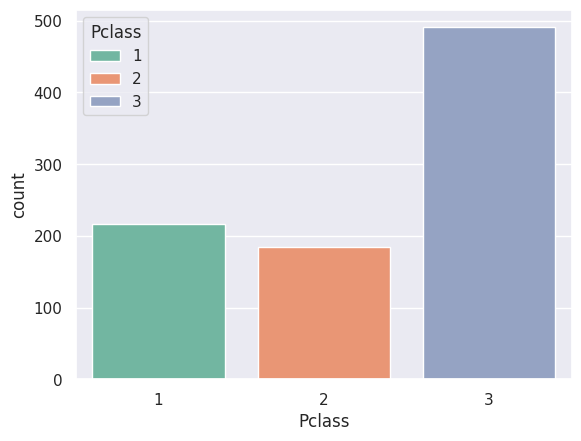

In [22]:
sns.set()
sns.countplot(x='Pclass', hue='Pclass', data=titanic_df, palette='Set2')

# Visualizing number of people Survived based on Class

<Axes: xlabel='Pclass', ylabel='count'>

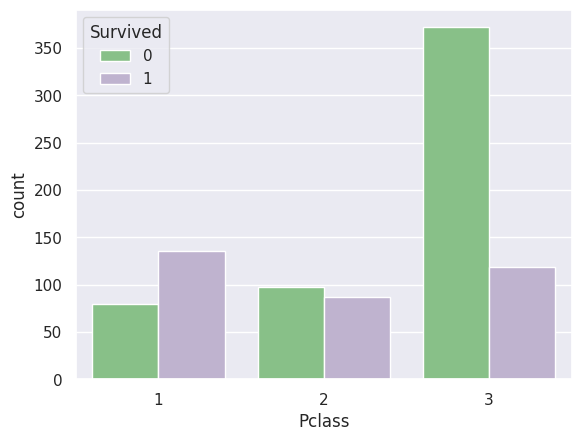

In [23]:
sns.set()
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette='Accent')

# Visualizing the number of people Survived based on embarkation

<Axes: xlabel='Embarked', ylabel='count'>

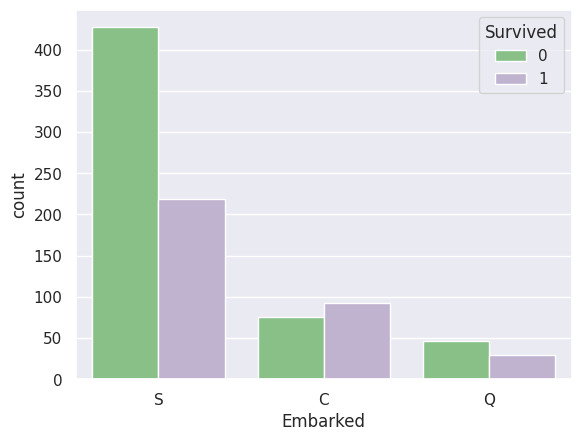

In [24]:
sns.set()
sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette='Accent')

# Visualizing the number of prople who Survived based on Sibling/Spouse

<Axes: xlabel='SibSp', ylabel='count'>

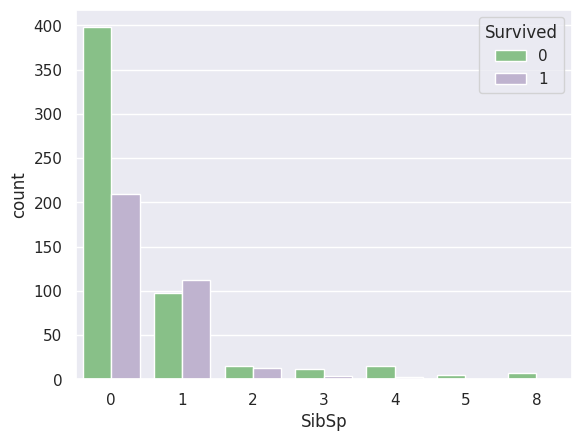

In [25]:
sns.set()
sns.countplot(x='SibSp', hue='Survived', data=titanic_df, palette='Accent')

# Encoding the Categorical Data Column

In [26]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
import pandas as pd
titanic_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Separating the Targeted and Featured Columns

In [30]:
X=titanic_df.drop(columns=['PassengerId','Name','Ticket','Survived','Fare'], axis=1)
Y=titanic_df['Survived']

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [32]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting Dataset into Train and Test Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape,X_train.shape, X_test.shape)

(891, 6) (712, 6) (179, 6)


# Logistic Regression -> Used for Model Training

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model=LogisticRegression()

In [38]:
# Training the Logistic Regression Model with Train Data
model.fit(X_train, Y_train)

LogisticRegression()

# Evaluating the Model using Accuracy Score

In [39]:
# Accuracy on Train Data
X_train_prediction=model.predict(X_train)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
training_data_accuracy

0.8117977528089888

In [42]:
# Accuracy on Test Data
X_test_prediction=model.predict(X_test)

In [43]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
test_data_accuracy

0.7877094972067039

# Creating the User Input Prediction Model

Purpose of the model -> To enter the details of a passenger (Male/Female)
and predicting the whether the Passenger Survived or Not Survived the Titanic Wreck. Finding probaility based on Class, Gender, Embarkment, Age etc.

In [47]:
# Function to take user input and make a prediction
def get_user_input():
    Pclass = int(input("Enter Pclass (1, 2, 3): "))
    Sex = input("Enter Sex (male, female): ").lower()
    Sex = 0 if Sex == 'male' else 1
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of siblings/spouses aboard: "))
    Parch = int(input("Enter number of parents/children aboard: "))
    Embarked = input("Enter Embarked (S, C, Q): ").upper()
    Embarked = {'S': 0, 'C': 1, 'Q': 2}[Embarked]

    # Creating a DataFrame from the user input
    user_data = pd.DataFrame([[Pclass, Sex, Age, SibSp, Parch, Embarked]],
                             columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'])

    # Making a prediction
    prediction = model.predict(user_data)
    prediction_proba = model.predict_proba(user_data)

    # Determining the predicted survival status and probability
    result = 'Survived' if prediction[0] == 1 else 'Did not survive'
    probability = prediction_proba[0][prediction[0]] * 100

    # Output of the result
    print(f'Prediction: {result} with a probability of {probability:.2f}%')

# Take user input and predict
get_user_input()

Enter Pclass (1, 2, 3): 3
Enter Sex (male, female): male
Enter Age: 65
Enter number of siblings/spouses aboard: 2
Enter number of parents/children aboard: 1
Enter Embarked (S, C, Q): C
Prediction: Did not survive with a probability of 98.97%
